In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from chesswinnerprediction.visualization.visualization import make_pie_plot

In [17]:
df = pd.read_csv(f"../data/raw/lichess_db_standard_rated_2017-03.csv")

In [39]:
baseline_columns = [
    "WhiteElo",
    "BlackElo",
    "Result",
    "Event",
    "TimeControl"
]

white_wins = "1-0"
black_wins = "0-1"
draw = "1/2-1/2"

In [19]:
df = df[baseline_columns]
df = df[df["Result"] != "*"]

df["Event"] = df["Event"].str.split(" http").str[0]

# df[["BaseTime", "IncrementTime"]] = df["TimeControl"].str.split("+", expand=True)
# df["BaseTime"] = df["BaseTime"].astype(np.int16)
# df["IncrementTime"] = df["IncrementTime"].astype(np.int16)

df["WhiteElo"] = df["WhiteElo"].astype(np.int16)
df["BlackElo"] = df["BlackElo"].astype(np.int16)

df["WhiteWin"] = (df["Result"] == "1-0").astype(np.int8)
df["BlackWin"] = (df["Result"] == "0-1").astype(np.int8)
df["Draw"] = (df["Result"] == "1/2-1/2").astype(np.int8)

df.drop(columns=["TimeControl"], inplace=True)

In [20]:
df["MeanElo"] = ((df["WhiteElo"] + df["BlackElo"]) / 2).astype(np.float32)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122226 entries, 0 to 122230
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   WhiteElo       122226 non-null  int16  
 1   BlackElo       122226 non-null  int16  
 2   Result         122226 non-null  object 
 3   Event          122226 non-null  object 
 4   BaseTime       122226 non-null  int16  
 5   IncrementTime  122226 non-null  int16  
 6   WhiteWin       122226 non-null  int8   
 7   BlackWin       122226 non-null  int8   
 8   Draw           122226 non-null  int8   
 9   MeanElo        122226 non-null  float32
dtypes: float32(1), int16(4), int8(3), object(2)
memory usage: 4.5+ MB


In [22]:
df.head()

,WhiteElo,BlackElo,Result,Event,BaseTime,IncrementTime,WhiteWin,BlackWin,Draw,MeanElo
0,1234,1467,0-1,Rated Blitz game,300,0,0,1,0,1350.5
1,1988,1960,1-0,Rated Blitz game,180,0,1,0,0,1974.0
2,1891,1900,1-0,Rated Blitz game,300,0,1,0,0,1895.5
3,1342,1364,1-0,Rated Classical game,600,0,1,0,0,1353.0
4,1575,1630,0-1,Rated Classical game,900,15,0,1,0,1602.5


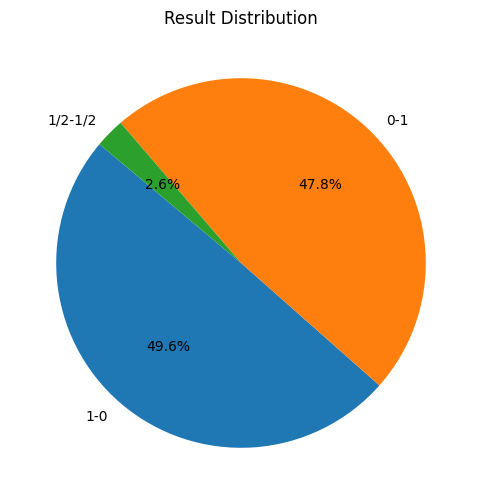

In [32]:
make_pie_plot(df, "Result", threshold=0)

Mean Elo: 1623.4574
Mean Elo for Draw: 1707.0508


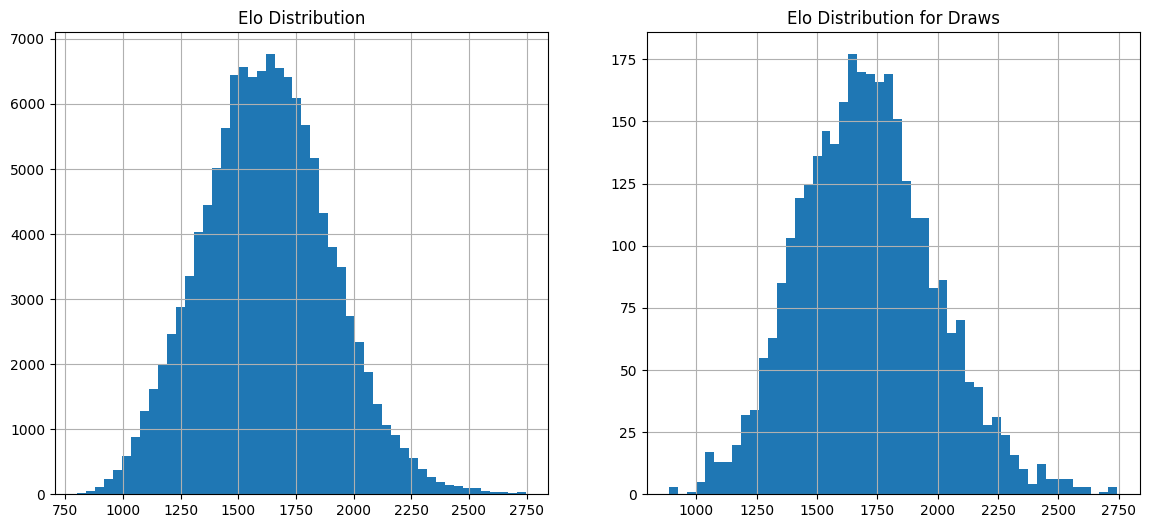

In [12]:
print("Mean Elo:", df["MeanElo"].mean())
print("Mean Elo for Draw:", df[df["Draw"] == 1]["MeanElo"].mean())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df["MeanElo"].hist(bins=50, ax=axes[0])
axes[0].set_title("Elo Distribution")

df[df["Draw"] == 1]["MeanElo"].hist(bins=50, ax=axes[1])
axes[1].set_title("Elo Distribution for Draws")

plt.show()

In [72]:
# df["EloDifference"] = (df["WhiteElo"] - df["BlackElo"]).abs()

In [84]:
# elo_df = pd.concat(
#     [df.rename(columns={"WhiteElo": "Elo"}), df.rename(columns={"BlackElo": "Elo"})], ignore_index=True
# )

# df["MeanEventElo"] = df["Event"].map(elo_df.groupby("Event")["Elo"].mean())
# df["MeanBaseTimeElo"] = df["BaseTime"].map(elo_df.groupby("BaseTime")["Elo"].mean())
# df["MeanIncrementTimeElo"] = df["IncrementTime"].map(elo_df.groupby("IncrementTime")["Elo"].mean())


# df["RawEventProb"] = df.groupby("Event")["Draw"].transform("mean")
# df["RawBaseTimeProb"] = df.groupby("BaseTime")["Draw"].transform("mean")
# 
# df["WhiteWinEventProb"] = df.groupby("Event")["WhiteWin"].transform("mean")
# df["WhiteWinIncrementTimeProb"] = df.groupby("IncrementTime")["WhiteWin"].transform("mean")

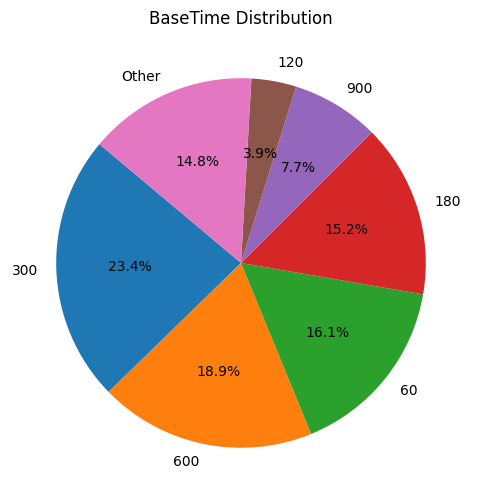

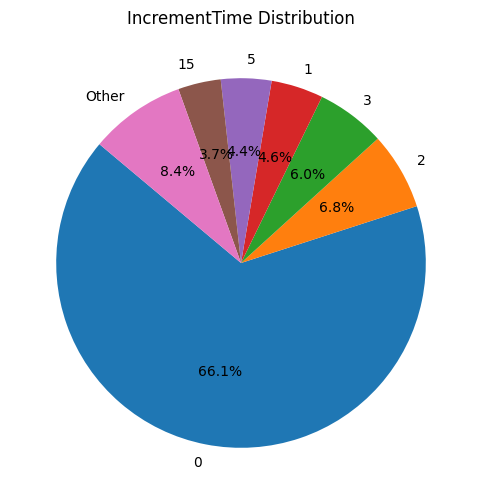

In [33]:
make_pie_plot(df, "BaseTime", 0.03)
make_pie_plot(df, "IncrementTime", 0.03)

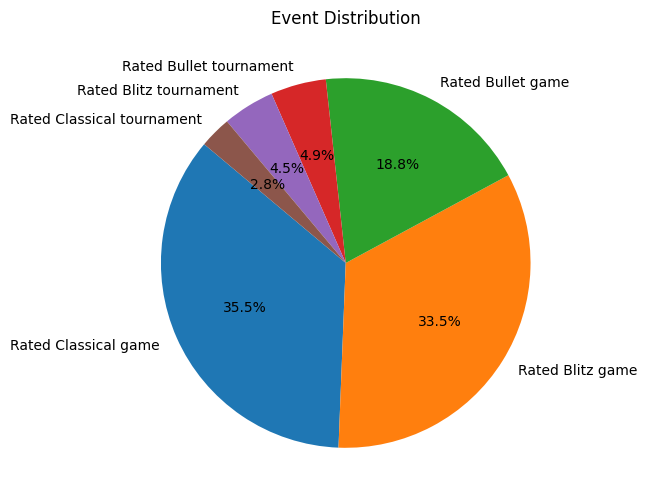

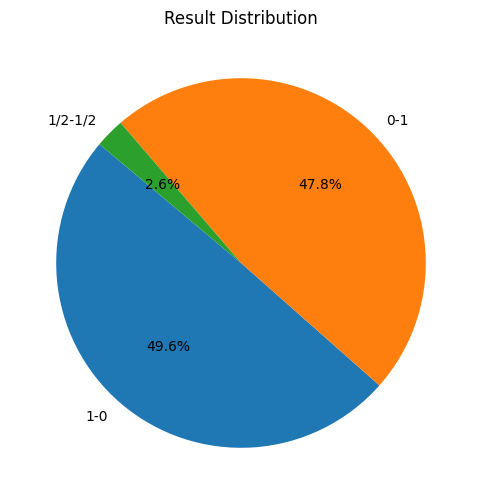

In [26]:
make_pie_plot(df, "Event", threshold=0)


In [35]:
draw_df = df[df["Result"] == draw]

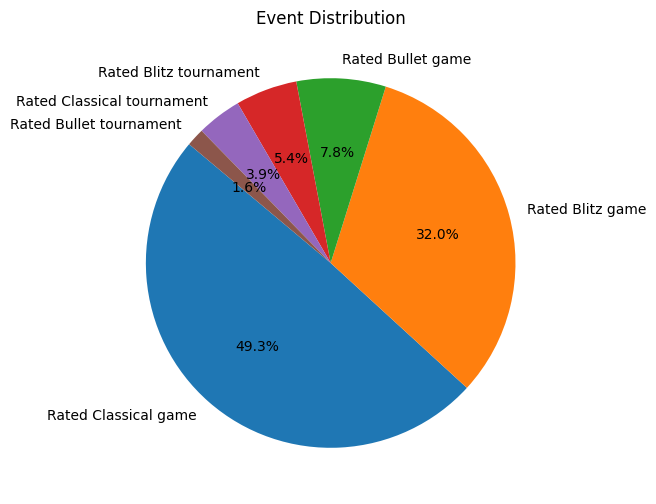

In [36]:
make_pie_plot(draw_df, "Event", threshold=0)

mean elo: 1623.4573495001064


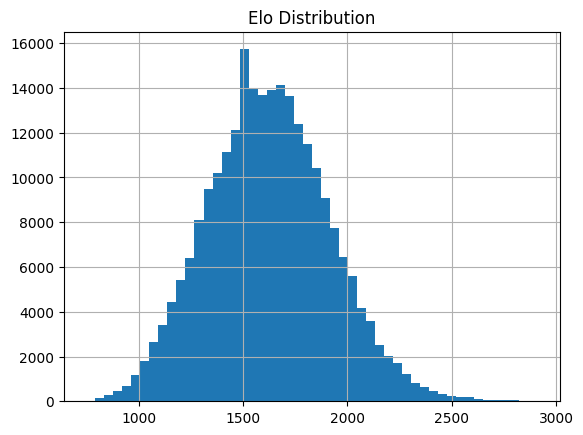

In [39]:
elo = pd.concat([df["WhiteElo"], df["BlackElo"]])
print("mean elo:", elo.mean())
elo.hist(bins=50)
plt.title("Elo Distribution")
plt.show()

In [42]:
draw_elo = pd.concat([draw_df["WhiteElo"], draw_df["BlackElo"]])

mean draw elo: 1707.0507269279394


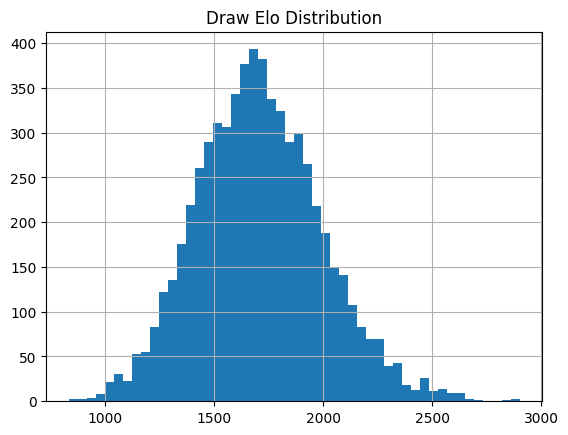

In [43]:
print("mean draw elo:", draw_elo.mean())
draw_elo.hist(bins=50)
plt.title("Draw Elo Distribution")
plt.show()

In [32]:
rated_classic_games_df = df[df["Event"] == "Rated Classical game"]
rated_blitz_games_df = df[df["Event"] == "Rated Blitz game"]

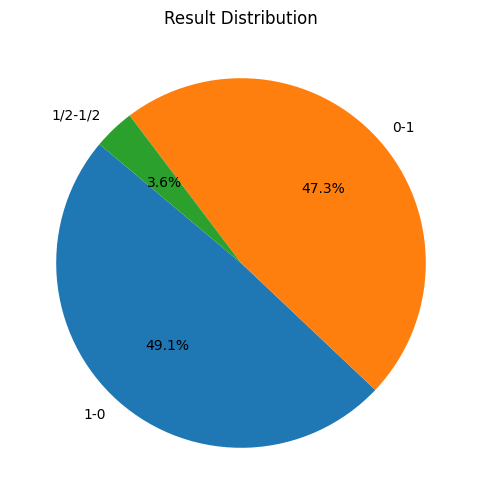

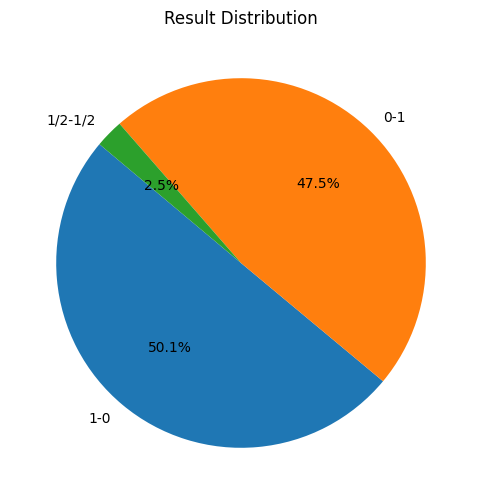

In [33]:
make_pie_plot(rated_classic_games_df, "Result")
make_pie_plot(rated_blitz_games_df, "Result")

In [62]:
def make_bar_plot_for_draw_count(data: pd.DataFrame, column_name: str):
    fig, ax = plt.subplots(figsize=(12, 6))
    axis = range(len(data[column_name]))
    ax.bar(axis, data["DrawCount"])

    ax.set_xticks(axis)
    ax.set_xticklabels(data[column_name], rotation=90)

    ax.set_xlabel(column_name)
    ax.set_ylabel("DrawCount")
    ax.set_title(f"DrawCount by {column_name}")
    plt.show()

In [68]:
base_time_grouped = draw_df.groupby("BaseTime").size().reset_index(name="DrawCount")
increase_time_grouped = draw_df.groupby("IncrementTime").size().reset_index(name="DrawCount")

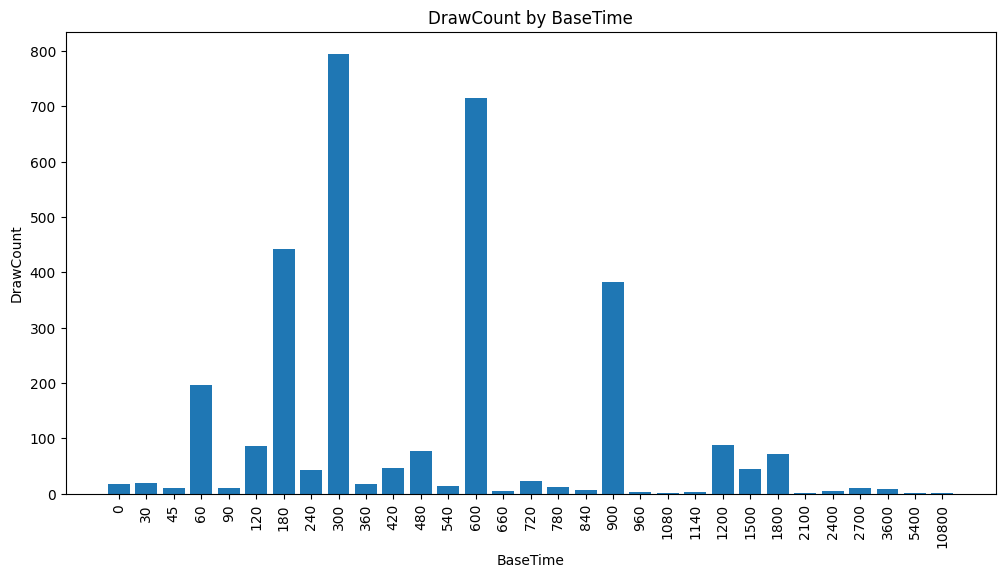

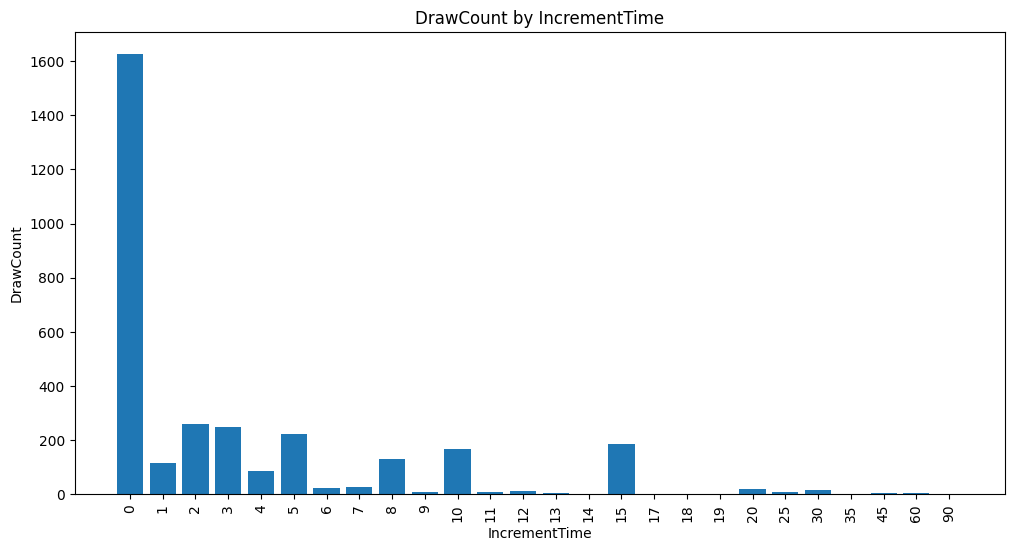

In [69]:
make_bar_plot_for_draw_count(base_time_grouped, "BaseTime")
make_bar_plot_for_draw_count(increase_time_grouped, "IncrementTime")

In [70]:
zero_increment_time = df[df["IncrementTime"] == 0]

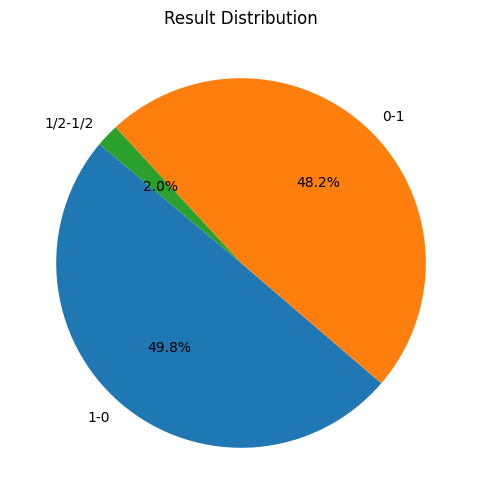

In [71]:
make_pie_plot(zero_increment_time, "Result")

In [ ]:
def estimate_prediction_by_elo(data_df: pd.DataFrame):
    white_elo_more_than_black = (data_df["WhiteElo"] > data_df["BlackElo"])

    white_win_condition = (white_elo_more_than_black & (data_df["Result"] == white_wins))
    black_win_condition = (~white_elo_more_than_black & (data_df["Result"] == black_wins))

    return (len(data_df[white_win_condition]) + len(data_df[black_win_condition])) / len(data_df)